In [785]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [1]:
data_set_x=np.genfromtxt("hw02_data_set_images.csv",delimiter=",")
data_set_y=np.genfromtxt("hw02_data_set_labels.csv",delimiter=",",dtype=np.str )

NameError: name 'np' is not defined

In [2]:
df=pd.DataFrame(data_set_y)
labelencoder = LabelEncoder()
df = labelencoder.fit_transform(df)
data_set_y=np.array(df)+1
data_set_y

NameError: name 'pd' is not defined

In [788]:
ntrain=int(data_set_x.shape[0]*25/39)
ntest=int(data_set_x.shape[0]*14/39)
D=data_set_x.shape[1]
K=5

In [789]:
xtrain=np.vstack([data_set_x[39*i:25+39*i] for i in range(K)])
xtest=np.vstack([data_set_x[25+39*i:39+39*i] for i in range(K)])
xtrain.shape

(125, 320)

In [790]:
ytrain=np.concatenate([data_set_y[39*i:25+39*i] for i in range(K)])
ytest=np.concatenate([data_set_y[25+39*i:39+39*i] for i in range(K)])
ytrain.shape

(125,)

In [791]:
Y_train = np.zeros((ntrain, K)).astype(int)
Y_train[range(ntrain), ytrain - 1] = 1

Y_test = np.zeros((ntest, K)).astype(int)
Y_test[range(ntest), ytest - 1] = 1
Y_test.shape

(70, 5)

In [792]:
eta=0.01
epsilon=1e-3

In [793]:
W=np.random.uniform(low = -0.01, high = 0.01, size = (D,K))
w0=np.random.uniform(low = -0.01, high = 0.01, size = K)
W.shape

(320, 5)

In [794]:
def sigmoid(X,W,w0):
    z=np.matmul(X,W)+w0
    if z.all()>0:
        return(1 / (1+np.exp(-z)))
    else:
        return np.exp(z)/(1+np.exp(z))

In [795]:
def gradient_W(X, Y_truth, Y_predicted):
    return(np.asarray(
        [-np.sum(
            np.repeat(((Y_truth[:,c] - Y_predicted[:,c])*Y_predicted[:,c]*(1-Y_predicted[:,c])
                      )[:, None], X.shape[1], axis = 1) * X, axis = 0
        ) for c in range(K)]
    ).transpose()
          )

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum((Y_truth - Y_predicted)*Y_predicted*(1-Y_predicted), axis = 0))

In [796]:
objective_values=[]
iteration=1
while 1:
        y_hat=sigmoid(xtrain,W,w0)
        
        error=np.sum(0.5*(Y_train-y_hat)**2)
        
        objective_values = np.append(objective_values,error)
        
        dW=gradient_W(xtrain,Y_train,y_hat)
        dw0=gradient_w0(Y_train,y_hat)
        
        w0_old=w0
        W_old=W
        
        W=W-eta*dW
        w0=w0-eta*dw0
    
        if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
                    break
        #if (iteration==2000):
        #        break
        
        iteration=iteration+1
        
print(iteration)

977


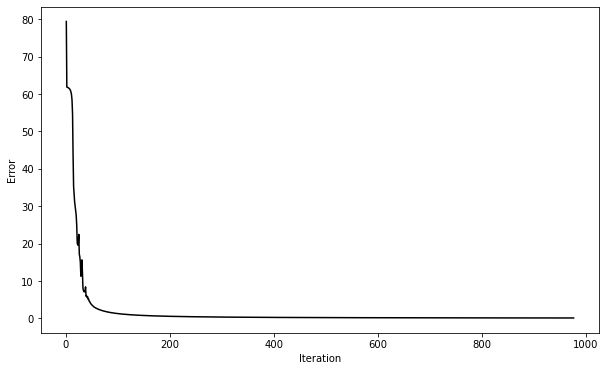

In [797]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [798]:
y_predicted = np.argmax(y_hat, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, ytrain, rownames = ['y_pred'], colnames = ['y_train'])
print(confusion_matrix)

y_train   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   0   0   0
3         0   0  25   0   0
4         0   0   0  25   0
5         0   0   0   0  25


In [799]:
Y=sigmoid(xtest,W,w0)
y_predicted = np.argmax(Y, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, ytest, rownames = ['y_pred'], colnames = ['y_test'])
print(confusion_matrix)

y_test   1   2   3   4   5
y_pred                    
1       13   1   0   0   0
2        1  11   0   0   2
3        0   0  14   0   0
4        0   0   0  14   0
5        0   2   0   0  12
